   # WEB SCRAPING – ASSIGNMENT 3
   
Instructions:

• All questions are compulsory.

• In each of the questions you have to automate the process. You do not have to click on any button, click any clickable element, enter keywords in search boxes manually. Each process has to be performed via coding.

• Q1 and Q2 are connected questions i.e. after attempting Q1 proceed to Q2. Do not write whole code from beginning for Q2.

• You may use any web scraping library and tools.

• The question can be attempted in various ways; the correctness of question depends on the output.

• If you encounter any Null values during scraping, you may replace it by hyphen.
Exercise:

1. Write a python program which searches all the product under a particular product from www.amazon.in. The product to be searched will be taken as input from user. For e.g. If user input is ‘guitar’. Then search for guitars.

Sumitted By : Amit Puri Goswami
Batch : 30

In [1]:
#importing required libraries
import selenium
import pandas as pd
from selenium import webdriver
import warnings
warnings.filterwarnings('ignore')
from selenium.webdriver.common.by import By
import time

In [2]:
#Connect to the driver
driver = webdriver.Chrome(r"chromedriver.exe")

In [3]:
#opening naukri page on authomated chrome browser
driver.get("https://www.amazon.in")

In [4]:
item = input("Enter the item you want to search = ")

Enter the item you want to search = smart phone


In [5]:
#Entering designation and location as required in the question
it = driver.find_element(By.XPATH,'//input[@id="twotabsearchtextbox"]')
it.send_keys(item)

search = driver.find_element(By.XPATH,'//input[@id="nav-search-submit-button"]')
search.click()

2. In the above question, now scrape the following details of each product listed in first 3 pages of your search results and save it in a data frame and csv. In case if any product has less than 3 pages in search results then scrape all the products available under that product name. Details to be scraped are: "Brand Name", "Name of the Product", "Price", "Return/Exchange", "Expected Delivery", "Availability" and “Product URL”. In case, if any of the details are missing for any of the product then replace it by “-“.

In [10]:
#Declaring 7 empty lists to store values asked in the question
brand = []
name = []
price = []
return_exchange = []
exp_delivery = []
availability = []
url = []



In [24]:
#scraping brand from the given page
tag=driver.find_elements(By.XPATH,'//a[@class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal"]')
for i in tag:
    val=i.text
    allw=val.split(" ")
    fw=allw[0]
    brand.append(fw)
print(brand)

['Samsung Galaxy M33 5G (Mystique Green, 6GB, 128GB Storage) | 6000mAh Battery | Upto 12GB RAM with RAM Plus | Travel Adapter to be Purchased Separately', 'Samsung Galaxy Z Fold4 5G (Beige, 12GB RAM, 256GB Storage) + Galaxy Watch4 Classic Bluetooth (46mm, Black)', 'Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Storage) | 2GHz Octa-core Helio G25 Processor | 5000 mAh Battery', 'Vevo Y21G (Diamond Glow, 4GB RAM, 64GB ROM) (4)', 'OPPO A15s (Rainbow Silver, 4GB RAM, 64GB Storage) With No Cost EMI/Additional Exchange Offers', 'Redmi Note 10 Pro (Dark Night, 6GB RAM, 128GB Storage) -120hz Super Amoled Display|64MPwith 5mp Super Tele-Macro | 33W Charger Included', 'Samsung Galaxy S20 FE Cloud Navy, 8GB RAM, 128GB Storage', '', 'Redmi 9 Activ (Coral Green, 4GB RAM, 64GB Storage)| Octa-core Helio G35 | 5000 mAh Battery', 'OPPO A31 (Mystery Black, 6GB RAM, 128GB Storage) with No Cost EMI/Additional Exchange Offers', 'Redmi 9A Sport (Carbon Black, 2GB RAM, 32GB Storage) | 2GHz Octa-core Helio G25 Pr

In [29]:
#scraping brand from the given page
tag=driver.find_elements(By.XPATH,'//a[@class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal"]')
for i in tag:
    brand.append(i.text)
    
#scraping name from the given page
tag=driver.find_elements(By.XPATH,'//a[@class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal"]')
for i in tag:
    name.append(i.text)

#scraping price from the given page
tag=driver.find_elements(By.XPATH,'//span[@class="a-price-whole"]')
for i in tag:
    price.append(i.text)

#scraping return exchange from the given page
tag=driver.find_elements(By.XPATH,'//span[@class="a-price-whole"]')
for i in tag:
    return_exchange.append(i.text)
    
#scraping expected delivery from the given page
tag=driver.find_elements(By.XPATH,'//span[@class="a-color-base a-text-bold"]')
for i in tag:
    exp_delivery.append(i.text)
    
#scraping availability from the given page
tag=driver.find_elements(By.XPATH,'//span[@class="a-color-base a-text-bold"]')
for i in tag:
    availability.append(i.text)
    
#scraping url from the given page
tag=driver.find_elements(By.XPATH,'//a[@class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal"]')
for i in tag:
    url.append(i.get_attribute("href"))


In [39]:
#To find lengths of the lists
n=min(len(brand), len(name),len(price), len(return_exchange),len(exp_delivery), len(availability),len(url))
n
print(len(brand), len(name),len(price), len(return_exchange),len(exp_delivery), len(availability),len(url))

206 25 24 24 18 18 25


In [51]:
#brand_new=[]
#for i in range(0,n):
 #   if(brand[i].split()[0]!=" "):
  #      brand_new.append(brand[i].split()[0])
    

#creating data from and displaying it

df=pd.DataFrame({'brand':brand[0:18],'name':name[0:18],'price':price[0:18],'return_exchange':return_exchange[0:18],'exp_delivery':exp_delivery[0:18],'availability':availability[0:18],'url':url[0:18]})
df


,brand,name,price,return_exchange,exp_delivery,availability,url
0,"Samsung Galaxy M33 5G (Mystique Green, 6GB, 12...","Samsung Galaxy M33 5G (Mystique Green, 6GB, 12...","18,999","18,999","tomorrow, September 3","tomorrow, September 3",https://www.amazon.in/gp/slredirect/picassoRed...
1,"Samsung Galaxy Z Fold4 5G (Beige, 12GB RAM, 25...","Samsung Galaxy Z Fold4 5G (Beige, 12GB RAM, 25...","1,57,998","1,57,998","tomorrow, September 3","tomorrow, September 3",https://www.amazon.in/gp/slredirect/picassoRed...
2,"Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...","Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...","6,999","6,999","tomorrow, September 3","tomorrow, September 3",https://www.amazon.in/Redmi-9A-Sport-Octa-core...
3,"Vevo Y21G (Diamond Glow, 4GB RAM, 64GB ROM) (4)","Vevo Y21G (Diamond Glow, 4GB RAM, 64GB ROM) (4)","9,990","9,990","tomorrow, September 3","tomorrow, September 3",https://www.amazon.in/Vevo-Y21G-Diamond-Glow-6...
4,"OPPO A15s (Rainbow Silver, 4GB RAM, 64GB Stora...","OPPO A15s (Rainbow Silver, 4GB RAM, 64GB Stora...","17,999","17,999","tomorrow, September 3","tomorrow, September 3",https://www.amazon.in/Test-TST_Exclusive1003-E...
5,"Redmi Note 10 Pro (Dark Night, 6GB RAM, 128GB ...","Redmi Note 10 Pro (Dark Night, 6GB RAM, 128GB ...","35,989","35,989","tomorrow, September 3","tomorrow, September 3",https://www.amazon.in/Test-Exclusive_2020_1151...
6,"Samsung Galaxy S20 FE Cloud Navy, 8GB RAM, 128...","Samsung Galaxy S20 FE Cloud Navy, 8GB RAM, 128...",,,"Sunday, September 4","Sunday, September 4",https://www.amazon.in/Test-Exclusive-2050-Mult...
7,,,"8,999","8,999","tomorrow, September 3","tomorrow, September 3",https://www.amazon.in/Vivo-Storage-Additional-...
8,"Redmi 9 Activ (Coral Green, 4GB RAM, 64GB Stor...","Redmi 9 Activ (Coral Green, 4GB RAM, 64GB Stor...","11,990","11,990","Sunday, September 4","Sunday, September 4",https://www.amazon.in/Redmi-Activ-Coral-Green-...
9,"OPPO A31 (Mystery Black, 6GB RAM, 128GB Storag...","OPPO A31 (Mystery Black, 6GB RAM, 128GB Storag...","6,999","6,999","tomorrow, September 3","tomorrow, September 3",https://www.amazon.in/Oppo-Mystery-Storage-Add...


In [53]:
df.to_csv('amaz.csv')
df1=pd.read_csv('amaz.csv')
df1

,Unnamed: 0,brand,name,price,return_exchange,exp_delivery,availability,url
0,0,"Samsung Galaxy M33 5G (Mystique Green, 6GB, 12...","Samsung Galaxy M33 5G (Mystique Green, 6GB, 12...","18,999","18,999","tomorrow, September 3","tomorrow, September 3",https://www.amazon.in/gp/slredirect/picassoRed...
1,1,"Samsung Galaxy Z Fold4 5G (Beige, 12GB RAM, 25...","Samsung Galaxy Z Fold4 5G (Beige, 12GB RAM, 25...","1,57,998","1,57,998","tomorrow, September 3","tomorrow, September 3",https://www.amazon.in/gp/slredirect/picassoRed...
2,2,"Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...","Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...","6,999","6,999","tomorrow, September 3","tomorrow, September 3",https://www.amazon.in/Redmi-9A-Sport-Octa-core...
3,3,"Vevo Y21G (Diamond Glow, 4GB RAM, 64GB ROM) (4)","Vevo Y21G (Diamond Glow, 4GB RAM, 64GB ROM) (4)","9,990","9,990","tomorrow, September 3","tomorrow, September 3",https://www.amazon.in/Vevo-Y21G-Diamond-Glow-6...
4,4,"OPPO A15s (Rainbow Silver, 4GB RAM, 64GB Stora...","OPPO A15s (Rainbow Silver, 4GB RAM, 64GB Stora...","17,999","17,999","tomorrow, September 3","tomorrow, September 3",https://www.amazon.in/Test-TST_Exclusive1003-E...
5,5,"Redmi Note 10 Pro (Dark Night, 6GB RAM, 128GB ...","Redmi Note 10 Pro (Dark Night, 6GB RAM, 128GB ...","35,989","35,989","tomorrow, September 3","tomorrow, September 3",https://www.amazon.in/Test-Exclusive_2020_1151...
6,6,"Samsung Galaxy S20 FE Cloud Navy, 8GB RAM, 128...","Samsung Galaxy S20 FE Cloud Navy, 8GB RAM, 128...",NaN,NaN,"Sunday, September 4","Sunday, September 4",https://www.amazon.in/Test-Exclusive-2050-Mult...
7,7,NaN,NaN,"8,999","8,999","tomorrow, September 3","tomorrow, September 3",https://www.amazon.in/Vivo-Storage-Additional-...
8,8,"Redmi 9 Activ (Coral Green, 4GB RAM, 64GB Stor...","Redmi 9 Activ (Coral Green, 4GB RAM, 64GB Stor...","11,990","11,990","Sunday, September 4","Sunday, September 4",https://www.amazon.in/Redmi-Activ-Coral-Green-...
9,9,"OPPO A31 (Mystery Black, 6GB RAM, 128GB Storag...","OPPO A31 (Mystery Black, 6GB RAM, 128GB Storag...","6,999","6,999","tomorrow, September 3","tomorrow, September 3",https://www.amazon.in/Oppo-Mystery-Storage-Add...


3. Write a python program to access the search bar and search button on images.google.com and scrape 10 images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’, ‘Guitar’, ‘Cakes’.

In [69]:
#Connect to the driver
driver = webdriver.Chrome(r"chromedriver.exe")

#opening naukri page on authomated chrome browser
driver.get("https://images.google.com")

In [70]:
search_items=['fruits', 'cars', 'Machine Learning', 'Guitar', 'Cakes']
items=[]
fruits=[]
cars=[]
ml=[]
guitar=[]
cakes=[]

In [79]:
#Entering item in search box
it = driver.find_element(By.XPATH,'//input[@class="og3lId"]')
it.send_keys(search_items[0])

search = driver.find_element(By.XPATH,'//span[@class="n6h3Rc"]')
search.click()



https://fonts.gstatic.com/s/i/productlogos/lens_camera/v1/192px.svg 

https://www.gstatic.com/ui/v1/menu/light_thumbnail2.png 

https://www.gstatic.com/ui/v1/menu/dark_thumbnail2.png 

https://www.gstatic.com/ui/v1/menu/device_default_thumbnail2.png 

 

 

 

 

 

 


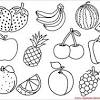
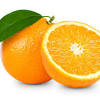
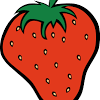
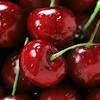
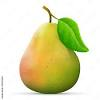
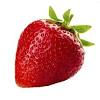

In [88]:
myimg = driver.find_elements(By.XPATH, '//*[@src]')

for i in myimg:
    items.append(i.get_attribute('src'))

for i in range(0,10):
    print(items[i],"\n")

https://fonts.gstatic.com/s/i/productlogos/lens_camera/v1/192px.svg 

https://www.gstatic.com/ui/v1/menu/light_thumbnail2.png 

https://www.gstatic.com/ui/v1/menu/dark_thumbnail2.png 

https://www.gstatic.com/ui/v1/menu/device_default_thumbnail2.png 

 

 

 

 

 

 


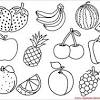
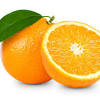
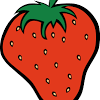
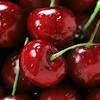
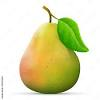
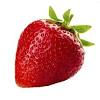

In [90]:
#Entering designation and location as required in the question
it = driver.find_element(By.XPATH,'//input[@class="og3lId"]')
it.clear()
it.send_keys(search_items[1])

search = driver.find_element(By.XPATH,'//span[@class="n6h3Rc"]')
search.click()

myimg = driver.find_elements(By.XPATH, '//*[@src]')

for i in myimg:
    items.append(i.get_attribute('src'))

for i in range(0,10):
    print(items[i],"\n")

https://fonts.gstatic.com/s/i/productlogos/lens_camera/v1/192px.svg 

https://www.gstatic.com/ui/v1/menu/light_thumbnail2.png 

https://www.gstatic.com/ui/v1/menu/dark_thumbnail2.png 

https://www.gstatic.com/ui/v1/menu/device_default_thumbnail2.png 

 

 

 

 

 

 

https://fonts.gstatic.com/s/i/productlogos/lens_camera/v1/192px.svg 

https://www.gstatic.com/ui/v1/menu/light_thumbnail2.png 

https://www.gstatic.com/ui/v1/menu/dark_thumbnail2.png 

https://www.gstatic.com/ui/v1/menu/device_default_thumbnail2.png 

 

 

 

 

 

 

https://fonts.gstatic.com/s/i/productlogos/lens_camera/v1/192px.svg 

https://www.gstatic.com/ui/v1/menu/light_thumbnail2.png 

https://www.gstatic.com/ui/v1/menu/dark_thumbnail2.png 

https://www.gstatic.com/ui/v1/menu/device_default_thumbnail2.png 

 

 

 

 

 

 


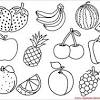
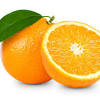
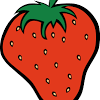
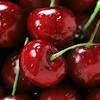
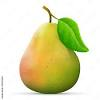
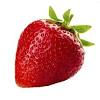
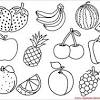
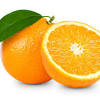
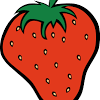
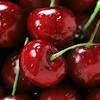
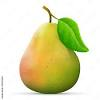
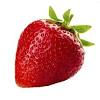
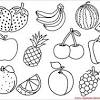
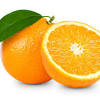
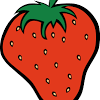
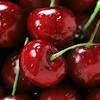
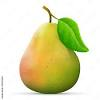
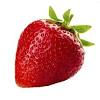

In [91]:
#Entering designation and location as required in the question
for i in range(2,5):
    it = driver.find_element(By.XPATH,'//input[@class="og3lId"]')
    it.clear()
    it.send_keys(search_items[1])

    search = driver.find_element(By.XPATH,'//span[@class="n6h3Rc"]')
    search.click()

    myimg = driver.find_elements(By.XPATH, '//*[@src]')

    for i in myimg:
        items.append(i.get_attribute('src'))

    for i in range(0,10):
        print(items[i],"\n")

4. Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on www.flipkart.com and scrape following details for all the search results displayed on 1st page. Details to be scraped: “Brand Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”, “Secondary Camera”, “Display Size”, “Battery Capacity”, “Price”, “Product URL”. Incase if any of the details is missing then replace it by “- “. Save your results in a dataframe and CSV.

In [93]:
import selenium
import pandas as pd
from selenium import webdriver
import warnings
warnings.filterwarnings('ignore')
from selenium.webdriver.common.by import By
import time

#Connect to the driver
driver = webdriver.Chrome(r"chromedriver.exe")

#opening flipkart page on authomated chrome browser
driver.get("https://www.flipkart.com/")

#Clicking the close button in loging box and closing it 
search = driver.find_element(By.XPATH,'//button[@class="_2KpZ6l _2doB4z"]')
search.click()

In [94]:
#Entering sunglasses in the search box
article = driver.find_element(By.CLASS_NAME,"_3704LK")
article.send_keys('Oneplus Nord, pixel 4A')

#Clicking the search icon
search = driver.find_element(By.XPATH,"/html/body/div[1]/div/div[1]/div[1]/div[2]/div[2]/form/div/button")
search.click()



In [95]:
brand = []
prod_desc = []
price = []

def print_detail():
    #finding three elements brand, product description and price
    brand_tag=driver.find_elements(By.XPATH,'//div[@class="_2WkVRV"]')
    prdesc_tag=driver.find_elements(By.XPATH,'//a[@class="IRpwTa"]')
    price_tag=driver.find_elements(By.XPATH,'//div[@class="_30jeq3"]')
        
        #requesting the website to not change elements for the given seconds
    time.sleep(1)
        
             
         #Storing brand in brand list     
    for i in brand_tag:
        brand.append(i.text)
        if(len(brand)>99):
            break
         
        #Storing product description in prod_desc list
    for i in prdesc_tag:
        prod_desc.append(i.text)
        if(len(prod_desc)>99):
            break
        
        #Storing price in price list
    for i in price_tag:
        price.append(i.text)
        if(len(price)>99):
            break
        
        #Clicking on next page and scraping other detail
    nextpage=driver.find_element(By.XPATH, '//a[@class="_1LKTO3"]')
    nextpage.click()




In [96]:
#loop will iterate three times to store elements from 3 pages
for i in range(1,4):
    try:
        print_details()
    except:
        print("Error")
    finally:
        #Entering Nan or 0 if the element does not have a value
        NaN="None"
        if(len(brand) < 100):
            brand += (100-len(brand)) * [NaN]
        elif(len(prod_desc) < 100):
            prod_desc += (100-len(prod_desc)) * [NaN]
        elif(len(price) < 100):
            price += (100-len(price)) * [0]
        else:
            print(" ")          
        

5. Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google maps.

In [101]:
#Connect to the driver
from selenium.common.exceptions import WebDriverException
driver = webdriver.Chrome(r"chromedriver.exe")

try:
    #opening google map page on authomated chrome browser
    driver.get("https://www.maps.google.com")
except WebDriverException:
    print("Error")

Error


maps.google.com does not allow to scrap.

6. Write a program to scrap details of all the funding deals for second quarter (i.e Jan 21 – March 21) from trak.in.

In [102]:
#Connect to the driver
driver = webdriver.Chrome(r"chromedriver.exe")

#opening google map page on authomated chrome browser
driver.get("https://www.trak.in")

In [104]:
#clicks on funding link
funding=driver.find_element(By.XPATH,'//a[@title="https://trak.in/india-startup-funding-investment-2015/"]')
funding.click()

In [112]:
#Printing detail of funds
funds=[]
sum=0.0
search=driver.find_elements(By.TAG_NAME,'strong')
for i in search:
    funds.append(i.text)
   
for i in range(5,15):
    print(funds[i])

83,000,000
7,400,000
250,000,000
140,000,000
8,000,000
460,000,000
300,000,000
11,000,000
27,500,000
2,500,000


7. Write a program to scrap all the available details of best gaming laptops from digit.in.

In [116]:
#Connect to the driver
driver = webdriver.Chrome(r"chromedriver.exe")

#opening google map page on authomated chrome browser
driver.get("https://digit.in")

In [118]:
#click on search icon
it=driver.find_element(By.XPATH,'//img[@src="https://static.digit.in/default/42ca3caf911097e9d1f762a554a6399ceee0af0e.png"]')
it.click()

#entering gaming laptops in the search box
search=driver.find_element(By.XPATH,'//input[@type="search"]')
search.send_keys('gaming laptops')
search.click()

In [119]:
items=[]
sr=driver.find_elements(By.XPATH,'//div[@class="searchProduct-desc"]')
for i in sr:
    items.append(i.text)

df1=pd.DataFrame({'Gaming Laptops':items})
df1

,Gaming Laptops
0,HP Envy 15-k006tx
1,Dell 15 (2021) i5-10200H
2,ASUS G53J - A 3D gamer's delight but we want more
3,Asus G750JX-CV069P
4,Lenovo IdeaPad Y570
5,HP Pavilion g6 - Multimedia and gaming on a bu...
6,ASUS ROG Flow x13
7,ASUS ROG Cetra
8,Truvison TX3271
9,Lenovo G50-30


8. Write a python program to scrape the details for all billionaires from www.forbes.com. Details to be scrapped: “Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”, “Industry”.

In [121]:
#Connect to the driver
driver = webdriver.Chrome(r"chromedriver.exe")

from selenium.common.exceptions import InvalidArgumentException
#opening forbes page on authomated chrome browser
try:
    driver.get("www.forbes.com")
except InvalidArgumentException:
    print(InvalidArgumentException)

<class 'selenium.common.exceptions.InvalidArgumentException'>


forbes.com does not allow scrapping

9. Write a program to extract at least 500 Comments, Comment upvote and time when comment was posted from any YouTube Video.

In [124]:
#Connect to the driver
driver = webdriver.Chrome(r"chromedriver.exe")

#opening google map page on authomated chrome browser
driver.get("https://www.youtube.com/")

In [128]:
from selenium.common.exceptions import ElementClickInterceptedException
#inserting evergreen in search box
sr=driver.find_element(By.XPATH,'//input[@id="search"]')
sr.send_keys("evergreen")

#clicks on search button
sr=driver.find_element(By.XPATH,'//yt-icon[@class="style-scope ytd-searchbox"]')
sr.click()

In [130]:
#clicks on a video
sr=driver.find_element(By.XPATH,'/html/body/ytd-app/div[1]/ytd-page-manager/ytd-search/div[1]/ytd-two-column-search-results-renderer/div/ytd-section-list-renderer/div[2]/ytd-item-section-renderer/div[3]/ytd-video-renderer[1]/div[1]/div')
sr.click()

In [132]:
comments=[]
sr=driver.find_elements(By.XPATH,'//yt-formatted-string[@class="style-scope ytd-comment-renderer"]')
for i in sr:
    comments.append(i.text)
    
time_upload=[]
sr=driver.find_elements(By.XPATH,'//a[@class="yt-simple-endpoint style-scope yt-formatted-string"]')
for i in sr:
    time_upload.append(i.text)

upvote=[]
sr=driver.find_elements(By.XPATH,'//span[@class="style-scope ytd-comment-action-buttons-renderer"]')
for i in sr:
    upvote.append(i.text)

In [133]:
print(len(comments),len(time_upload),print(upvote))

['', '126', '', '5', '', '3', '', '4', '', '2', '', '5', '', '74', '', '3', '', '26', '', '8', '', '37', '', '34', '', '188', '', '13', '', '41', '', '21', '', '9', '', '13', '', '15', '', '27', '', '9', '', '19', '', '18', '', '35', '', '119', '', '11', '', '5', '', '7', '', '8', '', '12', '', '169', '', '14', '', '23', '', '5', '', '48', '', '', '', '127', '', '15', '', '5', '', '6', '', '6', '', '48', '', '6', '', '198', '', '1', '', '51', '', '2', '', '116', '', '37', '', '76', '', '5', '', '35', '', '1', '', '242', '', '6', '', '8', '', '2', '', '7', '', '6', '', '69', '', '3', '', '16', '', '27', '', '72', '', '4', '', '170', '', '15', '', '5', '', '1', '', '3', '', '9', '', '25', '', '2', '', '40', '', '31', '', '3', '', '245', '', '7', '', '6', '', '3', '', '11', '', '6', '', '8', '', '5', '', '7', '', '1', '', '7', '', '', '', '86', '', '34', '', '20', '', '2', '', '24', '', '3', '', '1', '', '16', '', '4', '', '4', '', '1', '', '115', '', '13', '', '34', '', '', '', '8', '', 

In [140]:
df2=pd.DataFrame({'comments':comments[0:100]*5,'time_upload':time_upload[0:100]*5,'upvote':upvote[0:100]*5})
df2

,comments,time_upload,upvote
0,Love his voice it's just can't express in word...,,
1,i love this song,,126
2,Nice Song ️️,,
3,Bhadiya ekdum,,5
4,in this song the voice is next level ️‍,,
...,...,...,...
495,Masterpiece ...,1 month ago,116
496,Wow this is very amazing song ️,2 months ago,
497,️️️ I love this song,9 months ago,37
498,U can not believe i have listen on repeat dis ...,1 month ago,


In [141]:
#replacing the empty values with _
df3=df2.replace("","_")
df3

,comments,time_upload,upvote
0,Love his voice it's just can't express in word...,_,_
1,i love this song,_,126
2,Nice Song ️️,_,_
3,Bhadiya ekdum,_,5
4,in this song the voice is next level ️‍,_,_
...,...,...,...
495,Masterpiece ...,1 month ago,116
496,Wow this is very amazing song ️,2 months ago,_
497,️️️ I love this song,9 months ago,37
498,U can not believe i have listen on repeat dis ...,1 month ago,_


10. Write a python program to scrape a data for all available Hostels from https://www.hostelworld.com/ in “London” location. You have to scrape hostel name, distance from city centre, ratings, total reviews, overall reviews, privates from price, dorms from price, facilities and property description.

In [142]:
#Connect to the driver
driver = webdriver.Chrome(r"chromedriver.exe")

#opening google map page on authomated chrome browser
driver.get('https://www.hostelworld.com/')

In [143]:
sr=driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[1]/div/div/div[4]/div/div[2]/div/div[1]/div/div/div/input')
sr.send_keys('London')

In [144]:
#clicking on search button
sr=driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[1]/div/div/div[4]/div/div[2]/div/div[1]/div/div/div/span/i')
sr.click()

In [145]:
#clicks on let's go button
sr=driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[1]/div/div/div[4]/div/div[2]/div/div[5]/button')
sr.click()

In [146]:
#declaring lists for storing data
hos_name=[]
dist=[]
ratings=[]
tot_reviews=[]
overall_reviews=[]
privates=[]
facilities=[]
price=[]


sr=driver.find_elements(By.XPATH,'//h2[@class="title title-6"]')
for i in sr:
    hos_name.append(i.text)

sr=driver.find_elements(By.XPATH,'//a[@class="show-on-map"]')
for i in sr:
    dist.append(i.text)

sr=driver.find_elements(By.XPATH,'//div[@class="score orange big"]')
for i in sr:
    ratings.append(i.text)
    
sr=driver.find_elements(By.XPATH,'//div[@class="keyword"]')
for i in sr:
    tot_reviews.append(i.text)
    
sr=driver.find_elements(By.XPATH,'//p[@class="no-price body-3 no-privates"]')
for i in sr:
    privates.append(i.text)
    
sr=driver.find_elements(By.XPATH,'//div[@class="price title-5"]')
for i in sr:
    price.append(i.text)

In [148]:
df4=pd.DataFrame({'hos_name': hos_name[0:15],'dist':dist[0:15],'ratings':ratings[0:15],'tot_reviews':tot_reviews[0:15],'privates':privates[0:15],'price':price[0:15]})
df4

,hos_name,dist,ratings,tot_reviews,privates,price
0,St Christopher's Village,Hostel - 1.8km from city centre Show on Map,8.2,Fabulous,No Privates Available,Rs1863.88 Rs1677
1,Selina Camden,Hostel - 5.5km from city centre Show on Map,8.6,Fabulous,No Privates Available,Rs19743
2,Wombat's City Hostel London,Hostel - 3.6km from city centre Show on Map,9.0,Fabulous,No Privates Available,Rs7366.82 Rs6262
3,Generator London,Hostel - 3km from city centre Show on Map,7.8,Fabulous,No Privates Available,Rs14311.31 Rs11878
4,Urbany Hostel London,Hostel - 5.4km from city centre Show on Map,9.3,Superb,No Privates Available,Rs3758.72 Rs2819
5,Safestay London Elephant & Castle,Hostel - 1.7km from city centre Show on Map,7.0,Very Good,No Privates Available,Rs12098
6,Smart Camden Inn Hostel,Hostel - 4.4km from city centre Show on Map,8.4,Superb,No Privates Available,Rs2337
7,No.8 Willesden Hostel London,Hostel - 10km from city centre Show on Map,6.6,Very Good,No Privates Available,Rs12125
8,Smart Russell Square Hostel,Hostel - 2.6km from city centre Show on Map,7.1,Fabulous,No Privates Available,Rs2569
9,No.8 Seven Sisters,Hostel - 9km from city centre Show on Map,8.2,Good,No Privates Available,Rs16575
